In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate

In [27]:
def categorize(value):
    if 0 <= value <= 100:
        return 0
    elif 101 <= value <= 200:
        return 1
    else:
        return 2

def add_categories():
    file_path = '../output/training_data/train.csv'
    df = pd.read_csv(file_path)
    # Apply the categorize function to the numerical column and create a new column
    df['Category'] = df['num_triangles'].apply(categorize)

    # Save the DataFrame with the new column back to a CSV file
    df.to_csv('../output_file.csv', index=False)

In [28]:
add_categories()

In [3]:
# Load your CSV file containing image names, features, and labels
data = pd.read_csv('../output/training_data/train.csv')

In [4]:
# Load and preprocess black and white images
image_data = []
for image_file in data['name']:
    image = load_img('../output/tiles/' + image_file, color_mode='grayscale', target_size=(224, 224))
    image = img_to_array(image)
    image /= 255.0  # Normalize pixel values
    image_data.append(image)

image_data = np.array(image_data)

In [6]:
# Load numerical features and one-hot encode labels
features = data[['len_of_boundry_inv', 'disjoint_image']].values
labels = data['image_category'].values

# One-hot encode labels
labels = to_categorical(labels)


In [ ]:
num_classes = len(set(data['Category'].values))
print(labels.shape)

In [33]:
df = pd.DataFrame(labels)

# Check which columns have all zero values
all_zero_columns = df.columns[(df == 0).all()]
df = df.drop(all_zero_columns, axis=1)
print(all_zero_columns)

all_zero_after = df.columns[(df == 0).all()]
print(all_zero_after)

Index([], dtype='int64')
Index([], dtype='int64')


In [8]:
# Split the data into training, validation, and test sets for images
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Split the data into training, validation, and test sets for features
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.2, random_state=42)

In [10]:
def printshape(val):
    for v in val:
        print(v.shape)

In [11]:
printshape([X_train, X_test, X_val])
printshape([y_train, y_test, y_val])
printshape([features_train, features_test, features_val])
printshape([labels_train, labels_test, labels_val])

(1043, 224, 224, 1)
(327, 224, 224, 1)
(261, 224, 224, 1)
(1043, 3)
(327, 3)
(261, 3)
(1043, 2)
(327, 2)
(261, 2)
(1043, 3)
(327, 3)
(261, 3)


In [35]:
# Define the input layers
image_input = Input(shape=(224, 224, 1))
feature_input = Input(shape=(2,))

In [25]:
def create_model():
    # Define the input layers
    image_input = Input(shape=(224, 224, 1))
    feature_input = Input(shape=(2,))

    # CNN for processing images
    conv1 = Conv2D(32, (3, 3), activation='relu')(image_input)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    #conv2 = Conv2D(32, (3, 3), activation='relu')(maxpool1)
    #maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    flatten = Flatten()(maxpool1)

    # Dense network for processing features
    dense1 = Dense(64, activation='relu')(feature_input)

    # Combine the two networks
    merged = Concatenate()([flatten, dense1])

    # Fully connected layers
    fc1 = Dense(128, activation='relu')(merged)
    output = Dense(3, activation='softmax')(fc1)

    # Create the model
    model = keras.Model(inputs=[image_input, feature_input], outputs=output)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [15]:
def showDetails(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [26]:
model = create_model()

In [ ]:
model.summary()

In [27]:
# Train the model
history = model.fit([X_train, features_train], y_train, validation_data=([X_val, features_val], y_val), epochs=10)

Epoch 1/10
33/33 [==============================] - 61s 2s/step - loss: 19.6416 - accuracy: 0.6903 - val_loss: 3.2585 - val_accuracy: 0.8276
Epoch 2/10
33/33 [==============================] - 58s 2s/step - loss: 2.4966 - accuracy: 0.8035 - val_loss: 0.9514 - val_accuracy: 0.7969
Epoch 3/10
33/33 [==============================] - 59s 2s/step - loss: 0.7958 - accuracy: 0.8360 - val_loss: 0.8596 - val_accuracy: 0.7739
Epoch 4/10
33/33 [==============================] - 58s 2s/step - loss: 0.3432 - accuracy: 0.9003 - val_loss: 0.3883 - val_accuracy: 0.8889
Epoch 5/10
33/33 [==============================] - 58s 2s/step - loss: 0.1642 - accuracy: 0.9578 - val_loss: 0.4256 - val_accuracy: 0.8851
Epoch 6/10
33/33 [==============================] - 58s 2s/step - loss: 0.1303 - accuracy: 0.9722 - val_loss: 0.3753 - val_accuracy: 0.8851
Epoch 7/10
33/33 [==============================] - 58s 2s/step - loss: 0.1112 - accuracy: 0.9818 - val_loss: 0.3855 - val_accuracy: 0.8544
Epoch 8/10
33/33 [=

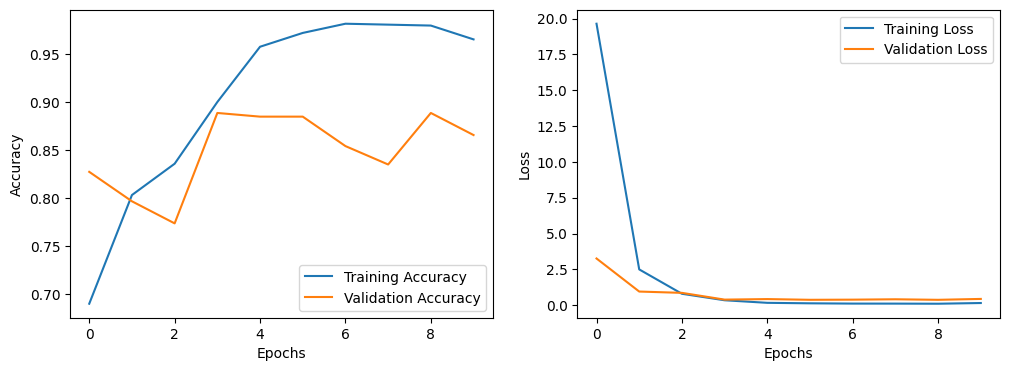

In [28]:
import matplotlib.pyplot as plt
showDetails(history)

11/11 [==============================] - 4s 332ms/step - loss: 0.5659 - accuracy: 0.8226
Test accuracy: 0.822629988193512


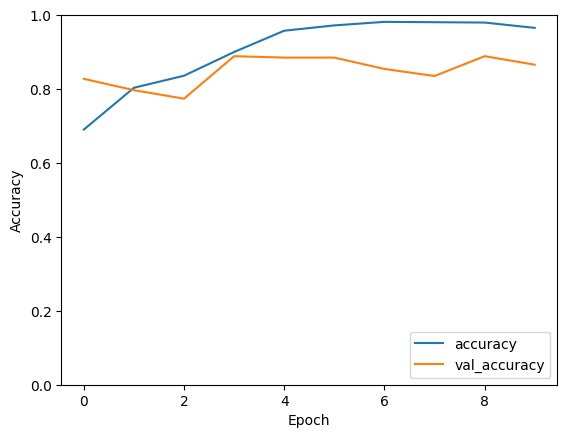

In [29]:
test_loss, test_accuracy = model.evaluate([X_test, features_test], y_test)
print(f'Test accuracy: {test_accuracy}')

# You can also plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


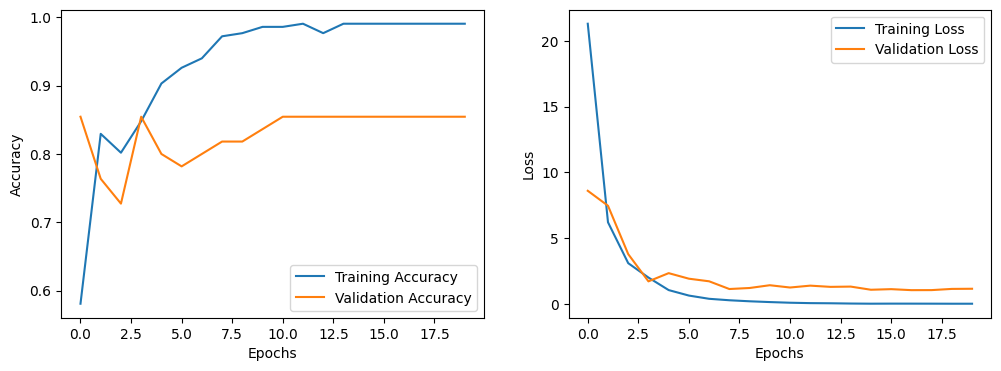

In [61]:
showDetails(history)

In [14]:
from keras.utils import plot_model, model_to_dot

# Assuming 'model' is your neural network model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# Assuming 'model' is your neural network model
dot = model_to_dot(model, show_shapes=True, show_layer_names=True)

# Save the DOT file
with open("model.dot", "w") as dot_file:
    dot_file.write(dot.to_string())


In [30]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0
